Install Required Packages

In [3]:
!pip install yfinance pandas numpy seaborn matplotlib PyPortfolioOpt

  Using cached pyportfolioopt-1.5.5-py3-none-any.whl.metadata (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.3 MB/s eta 0:00:00


Import Libraries

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pypfopt import risk_models, expected_returns, EfficientFrontier, plotting, objective_functions
from pypfopt import EfficientSemivariance
from pypfopt import EfficientFrontier, objective_functions

 Select Stocks

 The primary objective of this portfolio is to achieve a balance between growth and stability by investing in industry leaders from diverse sectors. This diversification helps mitigate risks associated with any single industry and aligns the portfolio with the goal of exceeding the current inflation rate while being mindful of potential losses



*   Apple Inc. (AAPL) - Technology Sector:

Apple is a global leader in consumer electronics, software, and online services. With a strong brand, loyal customer base, and consistent innovation.
*   Microsoft Corporation (MSFT) - Technology Sector:

Microsoft is a dominant player in software, hardware, and cloud computing. Its diversified product offerings, including Office 365, Azure, and LinkedIn, provide multiple revenue streams, making it a stable and growth-oriented investment.

*   Alphabet Inc. (GOOGL) - Technology Sector:

Alphabet, the parent company of Google, is a powerhouse in digital advertising, search engines, and cloud services.

*   Johnson & Johnson (JNJ) - Healthcare Sector:

Johnson & Johnson is a diversified healthcare giant with a strong presence in pharmaceuticals, medical devices, and consumer health products. Known for its stable earnings and dividend payouts, JNJ adds a defensive component to the portfolio, reducing overall volatility.

*   Procter & Gamble Co. (PG) - Consumer Staples Sector:

Procter & Gamble is a leading consumer goods company with a wide range of household and personal care products. The company has a long history of consistent performance and dividend growth, making it a reliable choice for income and stability.

*    Exxon Mobil Corporation (XOM) - Energy Sector:

Exxon Mobil is one of the world's largest publicly traded energy providers. Despite the challenges in the energy sector, ExxonMobil's strong balance sheet, integrated business model, and commitment to energy transition offer a balanced risk-reward profile.





In [13]:
tickers = ["AAPL", "MSFT", "GOOGL", "JNJ", "PG", "XOM"]

Fetch Historical Data

In [14]:
# Download historical data
ohlc = yf.download(tickers, period="5y")

# Extract the Adjusted Close prices
prices = ohlc["Adj Close"].dropna(how="all")

# Display the last few rows to verify data
prices.tail()


[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,GOOGL,JNJ,MSFT,PG,XOM
Date,,,,,,
2024-08-09,215.990005,163.669998,160.619995,406.019989,170.539993,118.849998
2024-08-12,217.529999,162.289993,159.880005,406.809998,166.809998,119.000000
2024-08-13,221.270004,164.160004,158.389999,414.010010,167.289993,117.860001
2024-08-14,221.720001,160.369995,158.479996,416.859985,168.800003,118.949997
2024-08-15,224.720001,161.300003,159.089996,421.029999,167.919998,118.730003


Data Visualization

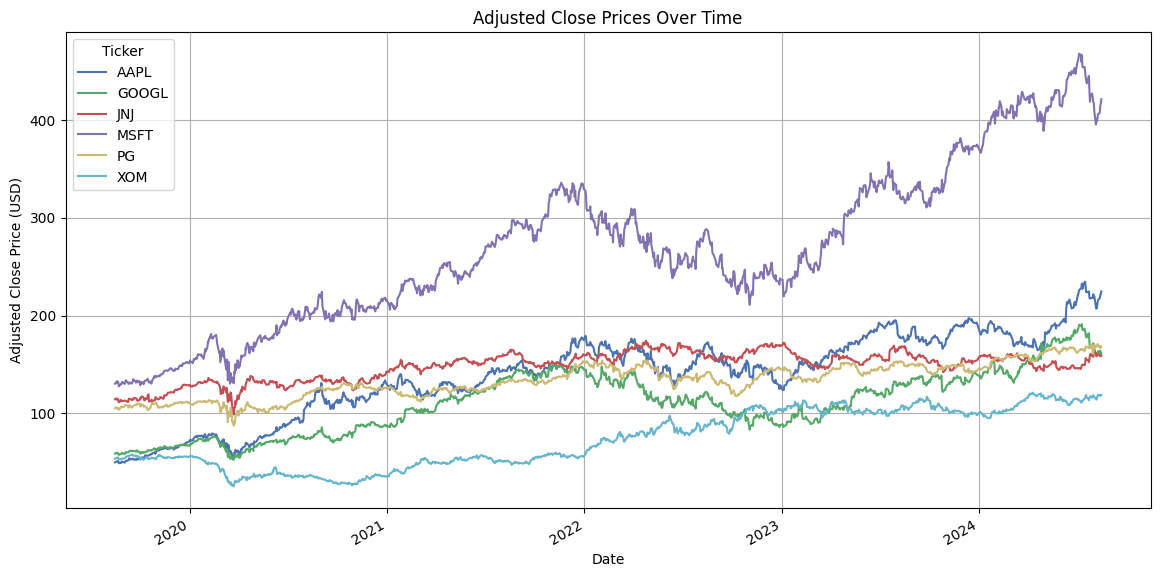

In [15]:
# Plot the adjusted closing prices
prices.plot(figsize=(14, 7), title="Adjusted Close Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")
plt.grid(True)
plt.show()

Calculate Expected Returns and Covariance Matrix

<Axes: >

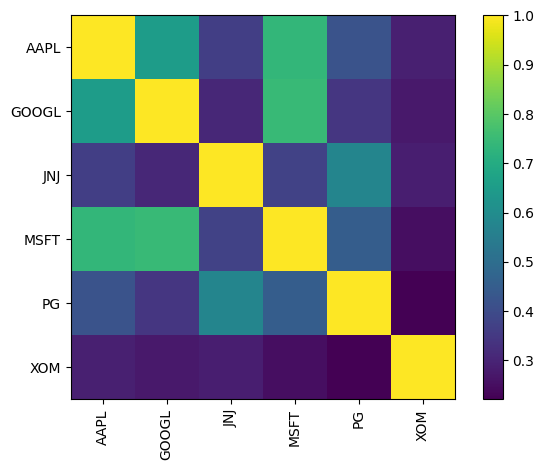

In [16]:
# Calculate the expected returns (using CAPM)
mu = expected_returns.capm_return(prices)

# Calculate the covariance matrix (using the Ledoit-Wolf shrinkage method)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# Display the covariance matrix
plotting.plot_covariance(S, plot_correlation=True)

Optimization Process

Optimal Weights for Minimum Volatility given Target Return: OrderedDict([('AAPL', 0.00147), ('GOOGL', 0.10103), ('JNJ', 0.43404), ('MSFT', 0.00227), ('PG', 0.34806), ('XOM', 0.11313)])
Expected annual return: 16.4%
Annual volatility: 17.5%
Sharpe Ratio: 0.82


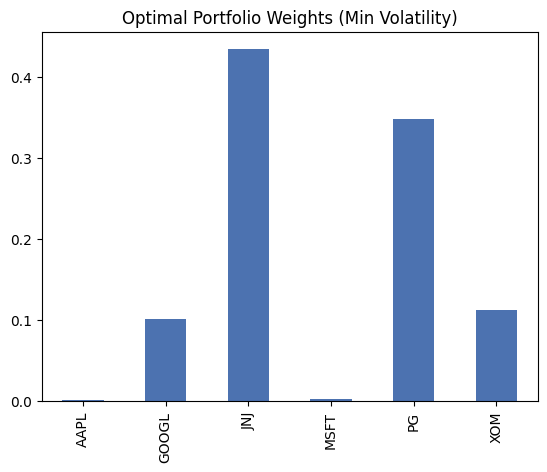

In [24]:
# Create the Efficient Frontier object
ef = EfficientFrontier(mu, S)


# Optimize for minimum volatility
ef.min_volatility()
weights = ef.clean_weights()

# Display the optimal weights
print("Optimal Weights for Minimum Volatility given Target Return:", weights)

# Portfolio performance
performance = ef.portfolio_performance(verbose=True)
# Plot the portfolio weights
pd.Series(weights).plot(kind='bar', title="Optimal Portfolio Weights (Min Volatility)")
plt.show()

Optimization for Sharpe Ratio

Optimal Weights for Max Sharpe Ratio: OrderedDict([('AAPL', 0.16816), ('GOOGL', 0.16726), ('JNJ', 0.16425), ('MSFT', 0.16816), ('PG', 0.16502), ('XOM', 0.16715)])


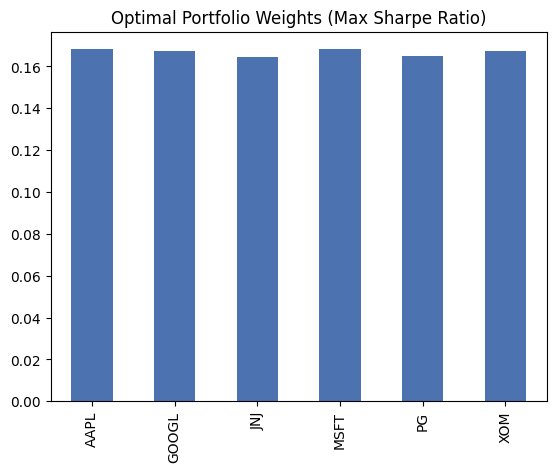

Expected annual return: 21.7%
Annual volatility: 20.5%
Sharpe Ratio: 0.96


(0.2173951896419969, 0.20473993257736992, 0.9641264757543208)

In [25]:
# Maximize Sharpe Ratio
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weights = ef.clean_weights()

# Display the optimal weights
print("Optimal Weights for Max Sharpe Ratio:", weights)

# Plot the portfolio weights
pd.Series(weights).plot(kind='bar', title="Optimal Portfolio Weights (Max Sharpe Ratio)")
plt.show()

# Portfolio performance (expected return, volatility, Sharpe ratio)
ef.portfolio_performance(verbose=True)

Handling Semivariance

Optimal Weights using Semivariance: OrderedDict([('AAPL', 0.10935), ('GOOGL', 0.12213), ('JNJ', 0.25955), ('MSFT', 0.15353), ('PG', 0.22508), ('XOM', 0.13036)])


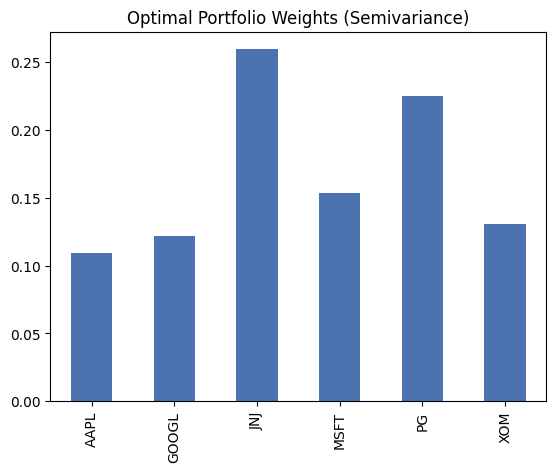

Expected annual return: 20.0%
Annual semi-deviation: 13.2%
Sortino Ratio: 1.37


(0.20000017400110975, 0.13171120264691855, 1.3666276701127742)

In [26]:
# Calculate daily returns from prices
returns = expected_returns.returns_from_prices(prices)

# Drop any rows with NaN values to clean the data
returns = returns.dropna()
# Perform portfolio optimization using Efficient Semivariance
ef = EfficientSemivariance(mu, returns)
ef.efficient_return(target_return=0.2)  # Adjust the target return as needed
weights = ef.clean_weights()

# Display the optimal weights for semivariance
print("Optimal Weights using Semivariance:", weights)

# Plot the portfolio weights
pd.Series(weights).plot(kind='bar', title="Optimal Portfolio Weights (Semivariance)")
plt.show()

# Portfolio performance using semivariance
ef.portfolio_performance(verbose=True)


Further Enhancements

Adjusted Weights with L2 Regularization: OrderedDict([('AAPL', 0.15584), ('GOOGL', 0.15727), ('JNJ', 0.18211), ('MSFT', 0.15712), ('PG', 0.1798), ('XOM', 0.16786)])


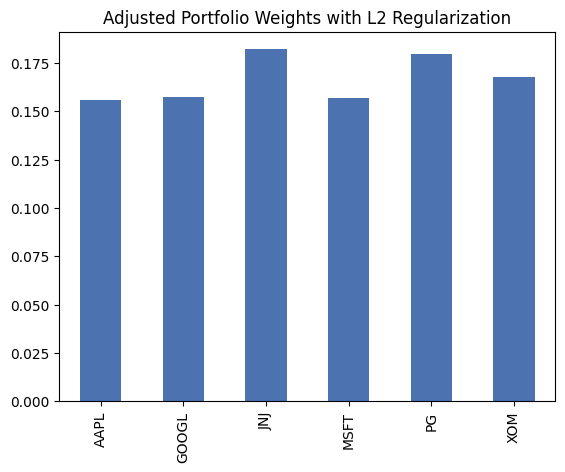

Expected annual return: 21.3%
Annual volatility: 20.1%
Sharpe Ratio: 0.96


(0.21328222684070094, 0.20060367117804098, 0.9635029394310434)

In [27]:
# Adding L2 regularization as an objective to penalize large positions
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()

# Display the adjusted weights with regularization
print("Adjusted Weights with L2 Regularization:", weights)
pd.Series(weights).plot(kind='bar', title="Adjusted Portfolio Weights with L2 Regularization")
plt.show()

# Portfolio performance after applying L2 regularization
ef.portfolio_performance(verbose=True)


Compare Expected Returns and Volatilities:

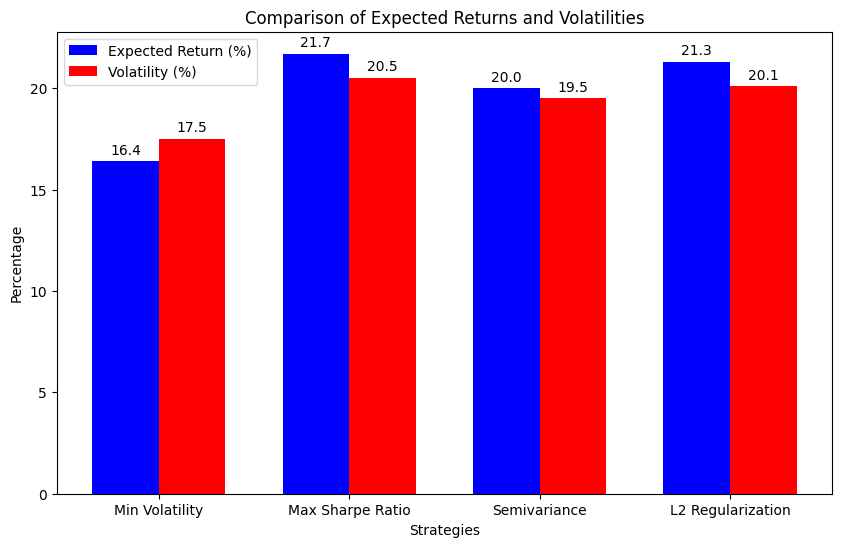

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the strategies
strategies = ['Min Volatility', 'Max Sharpe Ratio', 'Semivariance', 'L2 Regularization']
expected_returns = [16.4, 21.7, 20.0, 21.3]
volatilities = [17.5, 20.5, 19.5, 20.1]

x = np.arange(len(strategies))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for expected returns
rects1 = ax1.bar(x - width/2, expected_returns, width, label='Expected Return (%)', color='b')
# Bar chart for volatilities
rects2 = ax1.bar(x + width/2, volatilities, width, label='Volatility (%)', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Strategies')
ax1.set_ylabel('Percentage')
ax1.set_title('Comparison of Expected Returns and Volatilities')
ax1.set_xticks(x)
ax1.set_xticklabels(strategies)
ax1.legend()

# Function to add labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.show()


Compare Sharpe/Sortino Ratios

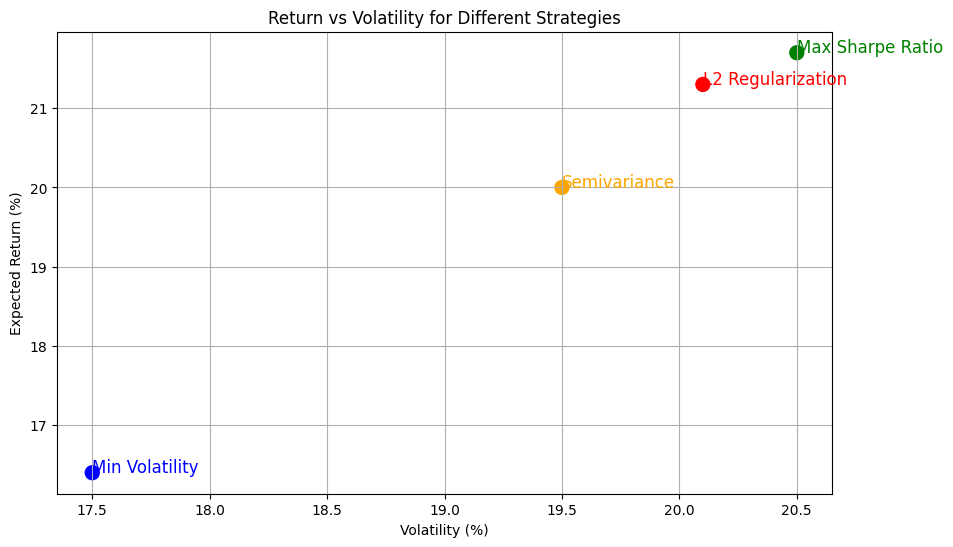

In [29]:
# Data for Sharpe/Sortino Ratios
ratios = [0.82, 0.96, 1.37, 0.96]
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))
plt.scatter(volatilities, expected_returns, c=colors, s=100, label='Strategies')

# Annotate the points with strategy names
for i, txt in enumerate(strategies):
    plt.annotate(txt, (volatilities[i], expected_returns[i]), fontsize=12, color=colors[i])

plt.title('Return vs Volatility for Different Strategies')
plt.xlabel('Volatility (%)')
plt.ylabel('Expected Return (%)')
plt.grid(True)
plt.show()


My objective is beating inflation and prioritizing returns while having a higher risk tolerance, let's compare the provided strategies:

1. Minimum Volatility Strategy:

Expected Annual Return: 16.4%

Annual Volatility: 17.5%

Sharpe Ratio: 0.82

Optimal Weights: Heavy allocation in stable stocks like JNJ and PG, with minimal allocation to AAPL and MSFT.

2. Maximum Sharpe Ratio Strategy:

Expected Annual Return: 21.7%

Annual Volatility: 20.5%

Sharpe Ratio: 0.96

Optimal Weights: Fairly balanced allocation across all selected stocks.

3. Semivariance Strategy:

Expected Annual Return: 20.0%

Annual Semi-Deviation (Downside Risk): 13.2%

Sortino Ratio: 1.37

Optimal Weights: More conservative, with higher allocations to JNJ and PG, which are traditionally less volatile.

4. L2 Regularization Strategy:

Expected Annual Return: 21.3%

Annual Volatility: 20.1%

Sharpe Ratio: 0.96

Optimal Weights: Similar to the Maximum Sharpe Ratio strategy but with slight adjustments to avoid extreme allocations.

**the Maximum Sharpe Ratio Strategy would be the most suitable for me**.

 Which offer a higher expected return (21.7%) compared to the other strategies and have reasonably managed volatility (around 20%).